In [1]:
import tensorflow as tf

In [2]:
fashion_mnist=tf.keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 5s 1us/step


In [6]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
assert X_train.shape==(60000, 28, 28)
assert X_test.shape==(10000, 28, 28)
assert y_train.shape==(60000,)
assert y_test.shape==(10000,)

In [7]:
# Summarize loaded dataset
print('Train:X=%s, y=%s'%(X_train.shape, y_train.shape))
print('Test:X=%s, y=%s'%(X_test.shape, y_test.shape))


Train:X=(60000, 28, 28), y=(60000,)
Test:X=(10000, 28, 28), y=(10000,)


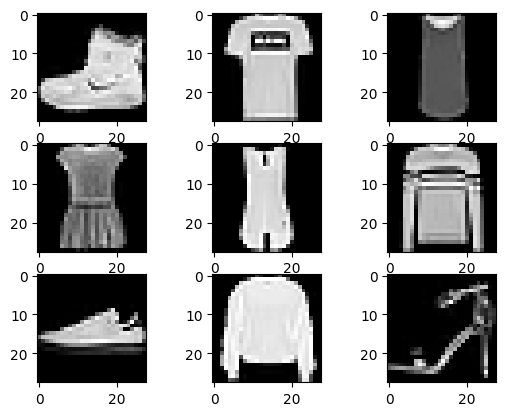

In [8]:
# Plot first few images 
import matplotlib.pyplot as plt

for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [10]:
# Preprocess the data 
X_train=X_train/255
X_test=X_test/255

In [11]:
# Create the model 
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'), # Relu since values from 0 to 1
    tf.keras.layers.Dense(10, activation='softmax') # softmax for multiclass classification
])

In [12]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5)

# Evaluate the model
test_loss, test_acc= model.evaluate(X_test, y_test)

# Print test accuracy and test loss
print('Test Accuracy:', test_acc)
print('Test Loss:', test_loss)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 1.1042 - accuracy: 0.6583
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6477 - accuracy: 0.7672
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5718 - accuracy: 0.7948
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5282 - accuracy: 0.8130
Epoch 5/5
313/313 [==============================] - 2s 4ms/step - loss: 0.5133 - accuracy: 0.8160
Test Accuracy: 0.8159999847412109
Test Loss: 0.5133355259895325


In [14]:
# Make predictions with the model 
predictions=model.predict(X_test)

# Print the shape of the predictions array 
print(predictions.shape)

# Print the first 10 predictions 
print(predictions[:10])

# Print the predictions to class labels
import numpy as np  
print(np.argmax(predictions, axis=1))

# Print the first 10 class labels
print(y_test[:10])


313/313 [==============================] - 1s 2ms/step
(10000, 10)
[[1.52466339e-06 5.77639057e-08 7.87271438e-06 1.38431724e-05
  2.42946189e-05 1.37897462e-01 1.94008790e-05 3.03486556e-01
  5.56140393e-03 5.52987576e-01]
 [6.60380931e-04 2.20729871e-05 8.36496890e-01 3.08656570e-04
  1.93819217e-02 3.90859149e-08 1.42929718e-01 1.71000678e-13
  2.00473500e-04 3.33784028e-10]
 [1.15441017e-05 9.99776065e-01 7.42481961e-06 1.37339608e-04
  6.72781534e-05 3.68623916e-11 4.20603726e-07 3.30909478e-09
  2.00164285e-09 7.51417817e-11]
 [2.13321346e-05 9.98652160e-01 2.32764341e-05 1.12939416e-03
  1.72215237e-04 5.38528866e-09 1.56978365e-06 1.05313873e-07
  1.14069207e-08 3.77518816e-09]
 [1.68639973e-01 9.65126324e-04 1.36999220e-01 3.14207263e-02
  1.63912065e-02 4.21099394e-05 6.39447868e-01 8.11760330e-08
  6.08784892e-03 5.76556113e-06]
 [6.77375472e-04 9.95138288e-01 3.32586031e-04 1.26477517e-03
  2.49132863e-03 8.39713021e-10 9.52920454e-05 8.26400104e-09
  2.12108603e-07 1.26364

Epoch 1/5
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5099 - accuracy: 0.8218 - val_loss: 0.4220 - val_accuracy: 0.8454
Epoch 2/5
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3834 - accuracy: 0.8627 - val_loss: 0.3567 - val_accuracy: 0.8766
Epoch 3/5
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3427 - accuracy: 0.8753 - val_loss: 0.3482 - val_accuracy: 0.8788
Epoch 4/5
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3187 - accuracy: 0.8828 - val_loss: 0.3363 - val_accuracy: 0.8734
Epoch 5/5
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3009 - accuracy: 0.8895 - val_loss: 0.3303 - val_accuracy: 0.8816


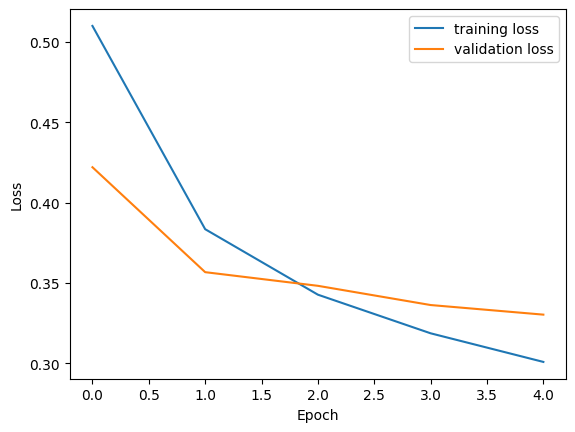

In [17]:
import tensorflow as tf 
import matplotlib.pyplot as plt 
(X_train, y_train), (X_test, y_test)=tf.keras.datasets.fashion_mnist.load_data()

# Preprocess the data 
X_train=X_train/255
X_test=X_test/255

# Split the data into training and validation sets 
X_valid, X_train=X_train[:5000], X_train[5000:]
y_valid, y_train=y_train[:5000], y_train[5000:]

# Build the model
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history= model.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))

# Plot the training and validation loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss') 
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



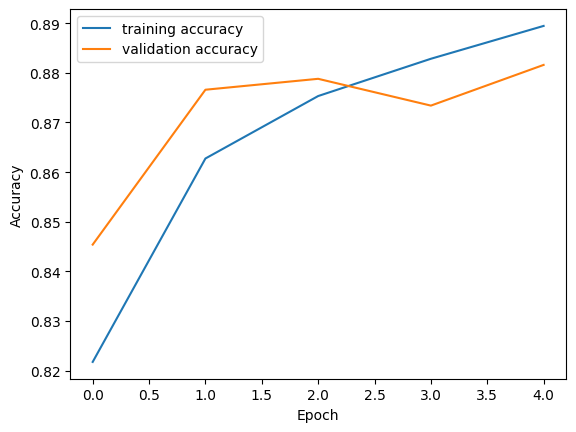

In [18]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [19]:
# Evaluate the model on the test data 
test_loss, test_acc= model.evaluate(X_test, y_test)
print('Test Accuracy:', test_acc)
print('Test Loss:', test_loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.3645 - accuracy: 0.8697
Test Accuracy: 0.869700014591217
Test Loss: 0.3645487427711487
